In [1]:
from google.colab import drive
drive.mount('/content/drive')
path_kaggle = "/content/drive/MyDrive/kaggle"
path_xray = path_kaggle + "/x-ray-dection"

path_train = path_xray + "/training"
path_train_fractured = path_train + "/fractured"
path_train_not_fractured = path_train + "/not_fractured"

path_test = path_xray + "/testing"
path_test_fractured = path_test + "/fractured"
path_test_not_fractured = path_test + "/not_fractured"

image_location_paths = [path_train_fractured, path_train_not_fractured, path_test_fractured, path_test_not_fractured]
image_train_location_paths = [path_train_fractured, path_train_not_fractured]
image_test_location_paths = [path_test_fractured, path_test_not_fractured]

Mounted at /content/drive


Посмотрим репрезентативность обучающей выборки

In [2]:
import os
def group_images(image_paths):

  grouped_imgs = dict()

  for path in image_paths:
    key = "/".join(path.split("/")[:-1]) + "/" + path.split("/")[-1].split(".")[0].split("-")[0]
    if key not in grouped_imgs:
      grouped_imgs[key] = []
    grouped_imgs[key].append(path)

  return grouped_imgs

images_paths = []

for path in image_train_location_paths:
  for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      full_path = os.path.join(dirname, filename)
      images_paths.append(full_path)

images = group_images(images_paths)
print(len(images))
for (key, value) in list(images.items())[:10]:
  print(f"Image {key}: samples {len(value)}")

178
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/74: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/72: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/73: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/71: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/80: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/79: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/77: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/76: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/78: samples 40


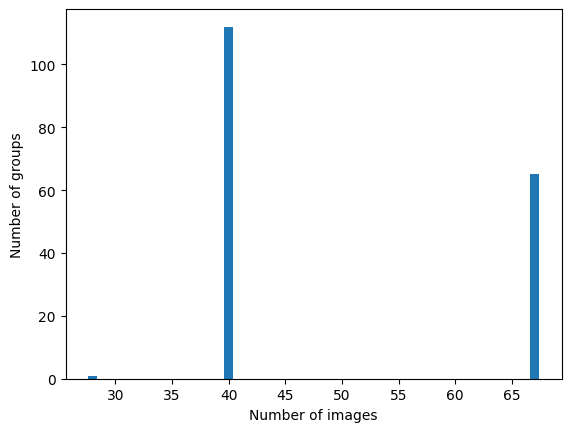

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

img_samples_dict = dict()
for key, value in images.items():
  if len(value) not in img_samples_dict:
    img_samples_dict[len(value)] = []
  img_samples_dict[len(value)].append(key)

fig, ax = plt.subplots()
ax.set_xlabel("Number of images")
ax.set_ylabel("Number of groups")

ax.bar(img_samples_dict.keys(), list(map(lambda x: len(x), img_samples_dict.values())))
plt.show()

In [4]:
import numpy as np
train_mean = np.mean(list(img_samples_dict.keys()))
train_std = np.std(list(img_samples_dict.keys()))
train_v = train_std / train_mean

print(f"Mean: {train_mean}")
print(f"Std: {train_std}")
print(f"Cov: {train_v}")

Mean: 45.0
Std: 16.30950643030009
Cov: 0.3624334762288909


Посмотрим, можем ли мы лучше разделить train & test вручную

In [5]:
from itertools import groupby
import os

def group_images(image_paths):

  grouped_imgs = dict()

  for path in image_paths:
    key = "/".join(path.split("/")[:-1]) + "/" + path.split("/")[-1].split(".")[0].split("-")[0]
    if key not in grouped_imgs:
      grouped_imgs[key] = []
    grouped_imgs[key].append(path)

  return grouped_imgs

images_paths = []

for path in image_location_paths:
  for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      full_path = os.path.join(dirname, filename)
      images_paths.append(full_path)

images = group_images(images_paths)
print(len(images))
for key, value in list(images.items())[:10]:
  print(f"Image {key}: samples {len(value)}")

191
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/74: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/72: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/73: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/71: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/80: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/79: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/77: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/76: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/78: samples 40


Key: 40, value: 121
Key: 67, value: 68
Key: 28, value: 1
Key: 39, value: 1


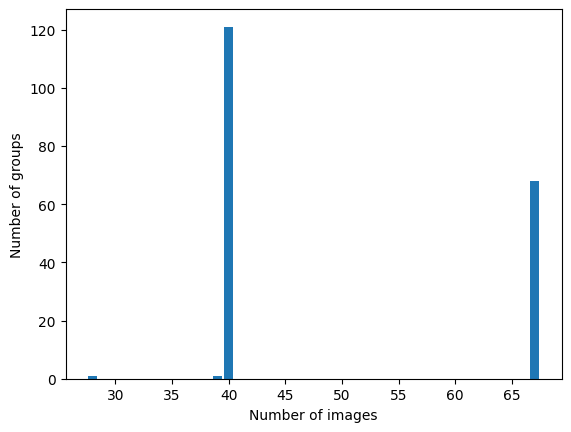

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

img_samples_dict = dict()
for key, value in images.items():
  if len(value) not in img_samples_dict:
    img_samples_dict[len(value)] = []
  img_samples_dict[len(value)].append(key)

fig, ax = plt.subplots()
ax.set_xlabel("Number of images")
ax.set_ylabel("Number of groups")

for key, value in img_samples_dict.items():
  print(f"Key: {key}, value: {len(value)}")

ax.bar(img_samples_dict.keys(), list(map(lambda x: len(x), img_samples_dict.values())))
plt.show()

In [7]:
train_mean = np.mean(list(img_samples_dict.keys()))
train_std = np.std(list(img_samples_dict.keys()))
train_v = train_std / train_mean

print(f"Mean: {train_mean}")
print(f"Std: {train_std}")
print(f"Cov: {train_v}")

Mean: 43.5
Std: 14.361406616345072
Cov: 0.3301472785366683


Видим, что результат сильно не улучшился. В датасете присутсвуют аномалии, 28 и 39 изображений для одного пациента. Поскольку 39 близко к матожиданию, оставим эти изображения, а 28 изображений перенесем в валидацию, т.к их скорее всего будут нерепрезентативными для обучения на ранних стадиях. Набор на 67 и 68 изображений обрежем до 40

In [8]:
images_filtered = []
for k, v in images.items():
  if len(v) <= 28:
    continue
  new_v = v[0:40] if len(v) > 40 else v
  new_v = v
  images_filtered.append(new_v)
  #images_filtered.append(k)
images_filtered = [item for imgs in images_filtered for item in imgs]

Разобъем выборку на train, val, test

В результате исследования были выявлены потенциальные риски:
1. Некачественные данные: малое или большое количество снимков -> смотрим на распределение и отсеиваем выбросы
2. Риск переобучения -> создаем валидационную выборку
3. Неправильная пометка данных (в train и test номера пациентов совпадают) -> вводим дополнительную метку для изначально предоставленного набора данных
Вывод:
В ходе работы я описал и устранил возможные риски при использовании данных с помощью анализа исходной выборки, подготовил данные и сделал разделение на тренировочную, валидационную и тестовую выборки

## Часть 2. Обучение модели

После 1-го обучения модели я получил точность порядка 50% на тестовых данных, что не очень меня впечатлило. Я решил еще раз взглянуть на изображения и понял, что почти все из них повернуты на ~20 градусов и фильтры нейронки просто не обучаются на "пустых областях". Дополнительно поворот на 90 градусов позволяет обрабатывать случаи симметричности (изображения повернуты в разные стороны в зависимости от того левая конечность или правая), как вариант можно было даже сгенерировать симметричные изображения, но колаб очень долго всё грузит  

In [9]:
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image

val_size = 0.2
test_size = 0.2
random_state = 42
images_filtered = list(map(lambda img_path: (np.asarray(Image.open(img_path).rotate(20).transpose(Image.FLIP_LEFT_RIGHT).convert('L')), float(1) if "not_fractured" in img_path else float(0)), images_filtered))
train_images, val_images = train_test_split(images_filtered, test_size=val_size, random_state=random_state)
train_images, test_images = train_test_split(train_images, test_size=test_size, random_state=random_state)

После разделения на train, val, test выборки также сожмем изображения до 224*224 (изображения такого вида будет принимать на вход наша нейросеть)

In [10]:
X_train = list(filter(lambda x: x is not None, map(lambda x: x[0], train_images)))
y_train = list(filter(lambda x: x is not  None, map(lambda x: x[1], train_images)))

X_val = list(filter(lambda x: x is not  None, map(lambda x: x[0], val_images)))
y_val = list(filter(lambda x: x is not  None, map(lambda x: x[1], val_images)))
X_test = list(filter(lambda x: x is not  None, map(lambda x: x[0], test_images)))
y_test = list(filter(lambda x: x is not None, map(lambda x: x[1], test_images)))

X_train = list(map(lambda x: np.resize(x, (224,224)), X_train))
X_val = list(map(lambda x: np.resize(x, (224,224)), X_val))

X_test = list(map(lambda x: np.resize(x, (224,224)), X_test))

In [11]:
import torch
torch.cuda.is_available()

True

In [12]:
X_train, y_train = torch.FloatTensor(X_train).cuda(), torch.FloatTensor(y_train).cuda()
print("X_train, y_train on cuda: ", X_train.is_cuda, y_train.is_cuda)
X_val, y_val = torch.FloatTensor(X_val).cuda(), torch.FloatTensor(y_val).cuda()
print("X_val, y_val on cuda: ", X_val.is_cuda, y_val.is_cuda)
X_test = torch.FloatTensor(X_test).cuda()
y_test = torch.FloatTensor(y_test).cuda()
print("X_test, y_test on cuda: ", X_test.is_cuda, y_test.is_cuda)


<ipython-input-12-68b86022c3b7>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X_train, y_train = torch.FloatTensor(X_train).cuda(), torch.FloatTensor(y_train).cuda()


X_train, y_train on cuda:  True True
X_val, y_val on cuda:  True True
X_test, y_test on cuda:  True True


Напишем свою нейросеть используя pytorch модули и датасеты (можно было взять готовую нейронку по типу AlexNet или LeNet, но я поздно сообразил)

Архитектура нейросети:

1. Image Bath \[40, 224, 224\] -> Conv1: kernel 3x3, stride = 1, padding = 0
2. Conv1 -> FC1 : kernel 2x2, stride = 2, padding = 0 (уменьшаем размерность изображения в 4 раза)
3. FC1 -> Conv2: kernel 3x3, stide = 1, padding = 0 (ищем новые паттерны)
4. Conv2 -> FC2: kernel 3x3, stride = 2, padding = 1 (снова уменьшаем размерность)

Применив сигмойду к FC2 получим бинарную классивикацию изображения на наличие переломов

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import copy

class BoneClassifier(nn.Module):
    def __init__(self):
      super(BoneClassifier, self).__init__()
      self.conv1 = nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=0)
      self.conv2 = nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=0)
      self.fc1 = nn.Linear(55 * 55, 28)
      self.fc2 = nn.Linear(28, 1)  # Binary classification

    def forward(self, x):
      x = nn.ReLU()(self.conv1(x))
      #print(x.shape)
      x = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)(x)
      #print(x.shape)
      x = nn.ReLU()(self.conv2(x))
      #print(x.shape)
      x = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)(x)
      #print(x.shape)
      x = x.view(-1, self.num_flat_features(x))  # Flatten the tensor
      x = nn.ReLU()(self.fc1(x))
      x = torch.sigmoid(self.fc2(x))  # Sigmoid for binary classification
      return x.flatten().type(torch.float64)
    def num_flat_features(self, x):
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
        num_features *= s
      return num_features

# Custom Dataset
class BoneDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
#    transforms.ToPILImage(),
    transforms.ToTensor()
#    transforms.Resize((224, 224)),  # Resize images to 224x224
])

# Create datasets
train_dataset = BoneDataset(X_train, y_train, transform=None)
val_dataset = BoneDataset(X_val, y_val, transform=None)

BATCH_SIZE = 40

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

# Initialize the model, loss function, and optimizer
model = BoneClassifier().cuda()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 250
best_acc = -1
best_weights = copy.deepcopy(model.state_dict())
loss_curve = []
for epoch in range(num_epochs):
    model.train(True)
    acc = 0.0
    batch_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
      optimizer.zero_grad()
      outputs = model(inputs.cuda())
      loss = criterion(outputs, labels.cuda().type(torch.float64))
      loss.backward()
      optimizer.step()
      acc += (outputs.round() == labels.cuda()).float().mean()
      batch_loss += loss.item()

    batch_loss /= (i + 1)
    loss_curve.append(batch_loss)
    acc = acc / (i + 1)

    with torch.no_grad():
      model.eval()
      val_acc = 0
      for i, (inputs, labels) in enumerate(val_loader, 0):
        outputs = model(inputs.cuda())
        val_acc += (outputs.round() == labels.cuda()).float().mean()
      avg_acc = val_acc / (i + 1)
      if avg_acc > best_acc:
          best_acc = avg_acc
          best_weights = copy.deepcopy(model.state_dict())
      print(f'Epoch [{epoch + 1}/{num_epochs}], Avg accuracy: {acc * 100:.4f}, Validation accuracy: {100 * avg_acc:.2f}%')
model.load_state_dict(best_weights)


Epoch [1/250], Avg accuracy: 49.9333, Validation accuracy: 49.52%
Epoch [2/250], Avg accuracy: 50.2333, Validation accuracy: 50.69%
Epoch [3/250], Avg accuracy: 49.3333, Validation accuracy: 50.64%
Epoch [4/250], Avg accuracy: 49.4167, Validation accuracy: 50.69%
Epoch [5/250], Avg accuracy: 50.3000, Validation accuracy: 52.07%
Epoch [6/250], Avg accuracy: 51.7000, Validation accuracy: 52.13%
Epoch [7/250], Avg accuracy: 49.1000, Validation accuracy: 50.37%
Epoch [8/250], Avg accuracy: 51.3667, Validation accuracy: 50.37%
Epoch [9/250], Avg accuracy: 49.7500, Validation accuracy: 49.84%
Epoch [10/250], Avg accuracy: 49.6167, Validation accuracy: 49.79%
Epoch [11/250], Avg accuracy: 48.5167, Validation accuracy: 49.84%
Epoch [12/250], Avg accuracy: 48.6667, Validation accuracy: 49.15%
Epoch [13/250], Avg accuracy: 48.6833, Validation accuracy: 49.47%
Epoch [14/250], Avg accuracy: 49.4333, Validation accuracy: 48.56%
Epoch [15/250], Avg accuracy: 50.8500, Validation accuracy: 48.62%
Epoc

<All keys matched successfully>

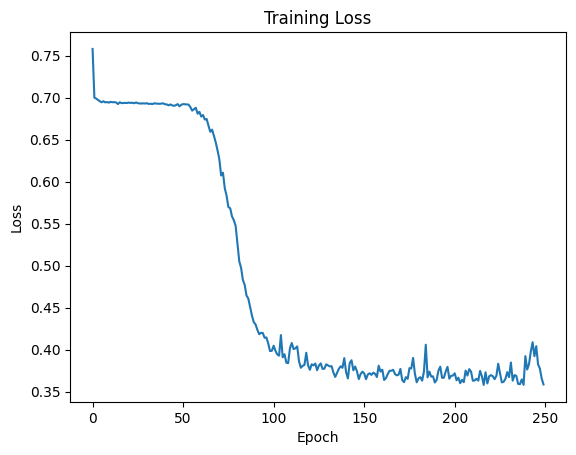

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [15]:
test_dataset = BoneDataset(X_test, y_test, transform = None)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

Настало время проверить точность нейронки на тестовых данных

In [43]:
with torch.no_grad():
  model.eval()
  acc = 0
  for i, (inputs, labels) in enumerate(test_loader, 0):
    outputs = model(inputs.cuda())
    loss = criterion(outputs, labels.cuda().type(torch.float64))
    acc += (outputs.round() == labels.cuda()).float().mean()
  print(f'Test Accuracy: {acc / (i + 1) * 100}')


Test Accuracy: 74.39189910888672


In [47]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%pip install torcheval
from torcheval.metrics import BinaryConfusionMatrix

metric = BinaryConfusionMatrix()

with torch.no_grad():
  model.eval()
  acc = 0
  cm = None
  for i, (inputs, labels) in enumerate(test_loader, 0):
    outputs = model(inputs.cuda())
    metric.update(labels.type(torch.int64), outputs.round().type(torch.int64))
print("Confusion matrix: ")
result = metric.compute()

tp, fn = result[0]
fp, tn = result[1]

print("tp:", tp, "fn:", fn)
print("fp:", fp, "tn:", tn)

total = tp + fn + fp + tn

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Accuracy: {(tp + tn) / total}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1 score: {precision * recall / (precision + recall)}")

Confusion matrix: 
tp: tensor(752.) fn: tensor(354.)
fp: tensor(11.) tn: tensor(363.)
Accuracy: 0.7533783912658691
Precision: 0.9855832457542419
Recall: 0.6799276471138
f1 score: 0.4023542106151581


Вывод

После первой тренировки нейросети я заметил еще несколько рисков при работе с изображениями:

1. Размерность изображения и ориентация в пространстве -> необходимо привести изображения к единому виду, пригодному для обучения
2. Не учтены особенности изображений с которомы мы работаем (например симметричность в случае данного датасета)
3. Некачественные изображения, которые необходимо убирать руками

В ходе работы были обработаны данные для датасета переломов костей, выявлены риски работы с данными. Была разработана нейросеть и обучена на очищенных данных и получены удовлетворительные значения для accuracy, precision & recall